In [1]:
import os
import glob
import re
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
scenes = ["scene0000_01", "scene0079_00", "scene0158_00", "scene0316_00", "scene0521_00", "scene0553_00", "scene0616_00"]


In [12]:
filepaths = glob.glob("./logs/*/nerf/results/depth_evaluation.txt")
# filepaths = filter(os.path.isfile, filepaths)

columns = ['exp_name', 'scene', 'factor', 'netdepth', 'netwidth', 'abs_rel', 'sq_rel', 'rmse', 'rmse_log', 'a1', 'a2', 'a3', 'psnr', 'ssim', 'lpips']
df = pd.DataFrame(columns=columns)
df = df.set_index('exp_name')

exp_name_regex = r"logs\/(.*)\/nerf\/results\/depth_evaluation\.txt"
settings_regex = r"f(\d*)d(\d*)w(\d*)"

for depth_path in filepaths:
    exp_name = re.search(exp_name_regex, depth_path).group(1).split('_')
    scene = "_".join(exp_name[:-1])
    exp_name = "_".join(exp_name)
    rgb_path = "./logs/{}/nerf/results/rgb_evaluation.txt".format(exp_name)
    if scene:
        with open(depth_path, 'r') as file:
            # get second line
            depth_data = file.read().split('\n')[1]
            # discard double slash
            depth_data = depth_data.split('\\')[0]
            # discard double slash
            depth_data = depth_data.split('& ')
            # remove whitespace and convert to float
            depth_data = map(lambda s: float(s.strip()), depth_data[1:])
            # convert to dictionary with column names as keys
            depth_data = dict(zip(columns[-10:-3], depth_data))
            
            
        with open(rgb_path) as file:
            # split by comma
            rgb_data = file.read().split(',')
            # remove whitespace and convert to float
            rgb_data = map(lambda s: float(s.split(':')[1].strip()), rgb_data)
            # convert to dictionary with column names as keys
            rgb_data = dict(zip(columns[-3:], rgb_data))
        
        data = depth_data | rgb_data
        
        # add setting data
        settings = re.search(settings_regex, exp_name)
        factor, netdepth, netwidth = settings.groups(1)
        data['scene'] = scene
        data['factor'], data['netdepth'], data['netwidth'] = int(factor), int(netdepth), int(netwidth)

        df.loc[exp_name] = data
df

,scene,factor,netdepth,netwidth,abs_rel,sq_rel,rmse,rmse_log,a1,a2,a3,psnr,ssim,lpips
exp_name,,,,,,,,,,,,,,
scene0521_00_f2d08w0064,scene0521_00,2,8,64,0.0534,0.0079,0.0893,0.0815,0.9643,0.9969,1.0000,27.402130,0.895631,0.345245
scene0079_00_f2d08w0448,scene0079_00,2,8,448,0.0440,0.0068,0.1158,0.0630,0.9920,0.9994,1.0000,27.633673,0.921657,0.271922
scene0316_00_f2d04w0256,scene0316_00,2,4,256,0.0520,0.0144,0.1604,0.0806,0.9700,0.9960,0.9999,20.471155,0.896009,0.302048
scene0553_00_f2d08w0320,scene0553_00,2,8,320,0.0470,0.0099,0.1278,0.0820,0.9591,0.9988,0.9998,33.949875,0.969777,0.136902
scene0521_00_f2d14w0256,scene0521_00,2,14,256,0.0550,0.0077,0.0883,0.0812,0.9673,0.9970,1.0000,29.425247,0.916857,0.264020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scene0521_00_f2d08w0512,scene0521_00,2,8,512,0.0569,0.0089,0.0952,0.0848,0.9629,0.9960,1.0000,29.257259,0.915044,0.247471
scene0521_00_f2d04w0256,scene0521_00,2,4,256,0.0530,0.0073,0.0860,0.0792,0.9699,0.9972,1.0000,28.965210,0.912147,0.286466
scene0616_00_f2d08w0256,scene0616_00,2,8,256,0.0608,0.0153,0.1645,0.0939,0.9638,0.9907,0.9979,18.455402,0.774732,0.385757


/home/ccl/anaconda3/envs/NeRF/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


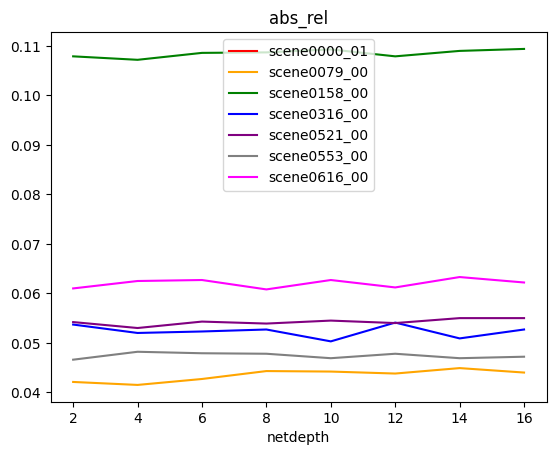

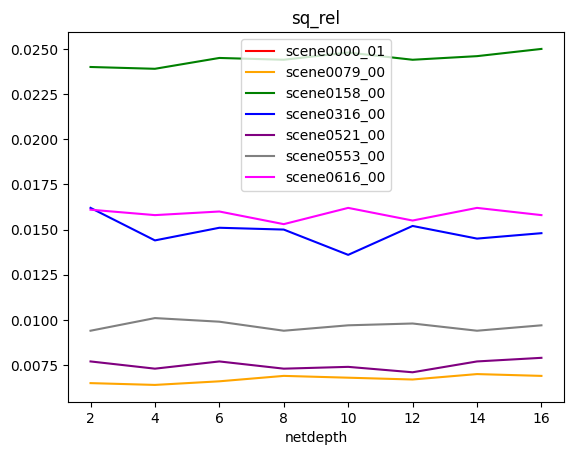

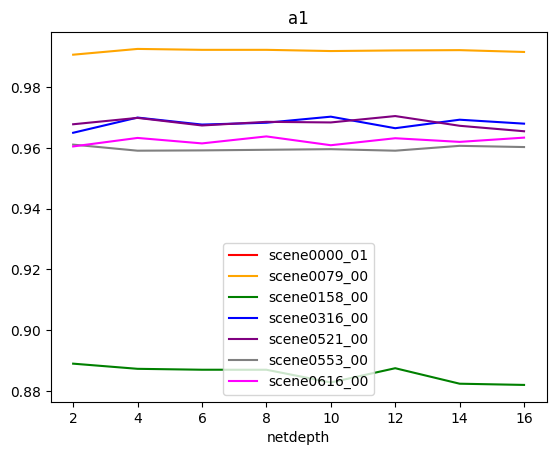

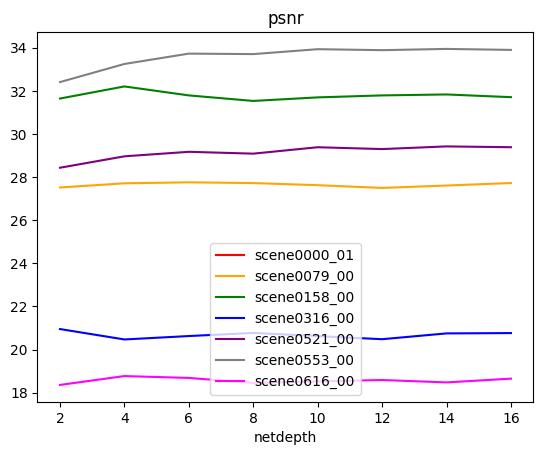

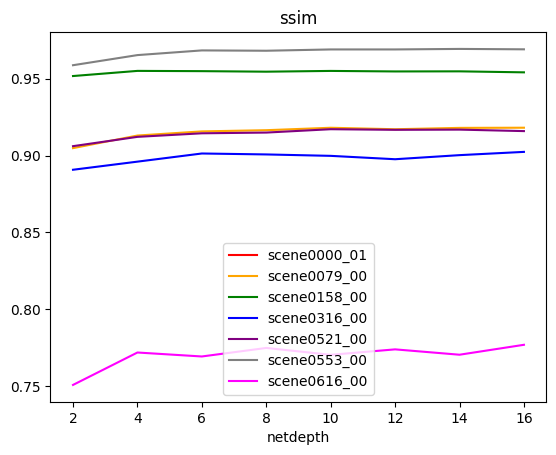

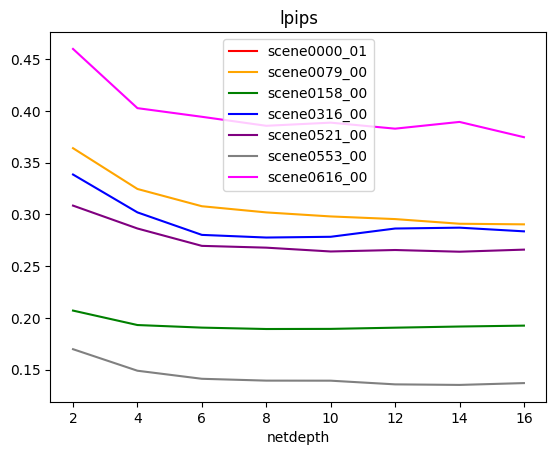

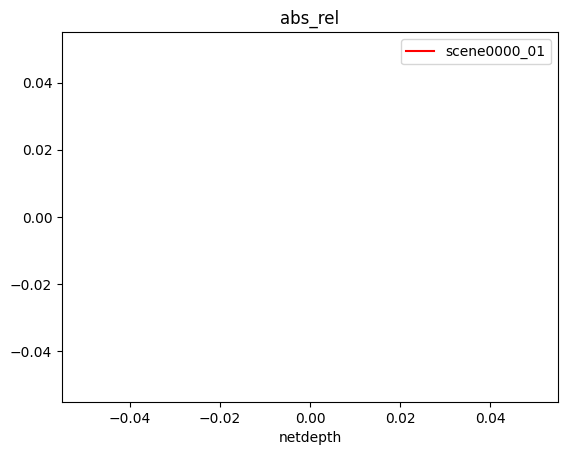

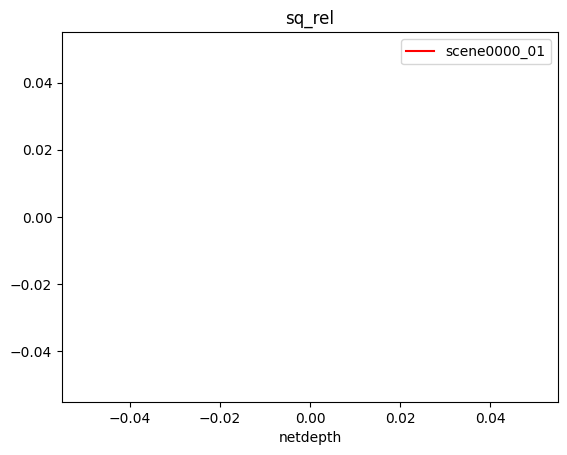

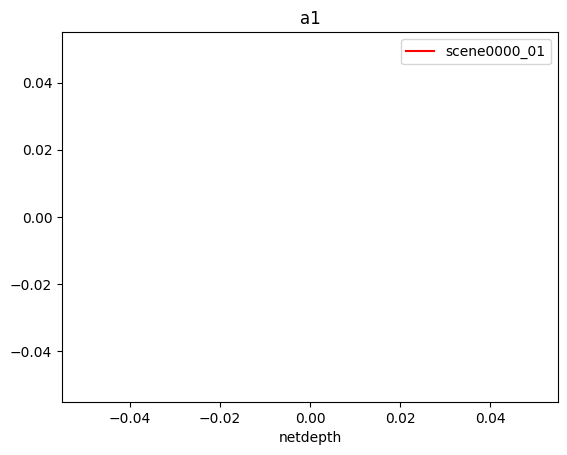

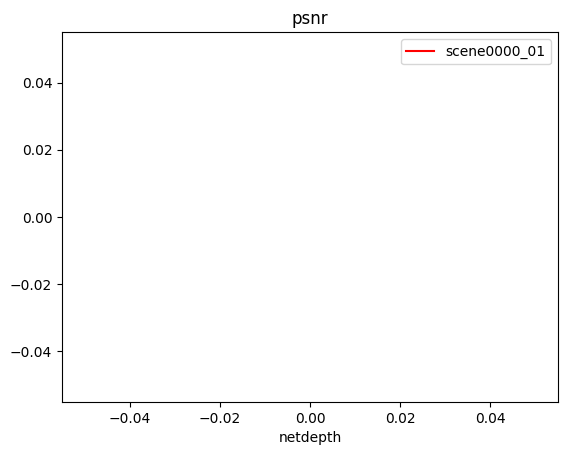

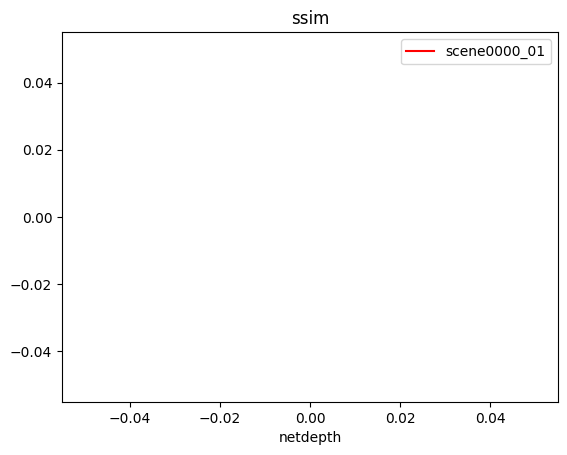

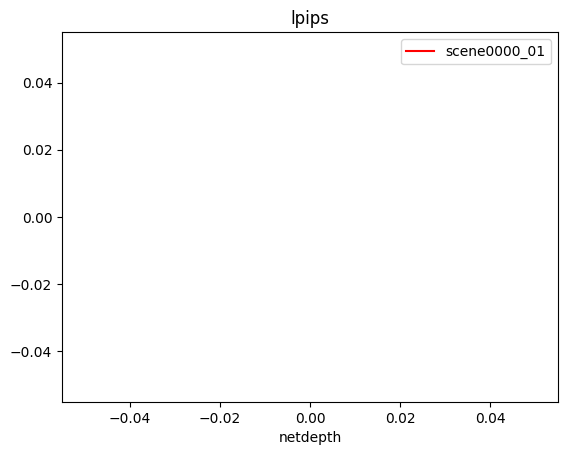

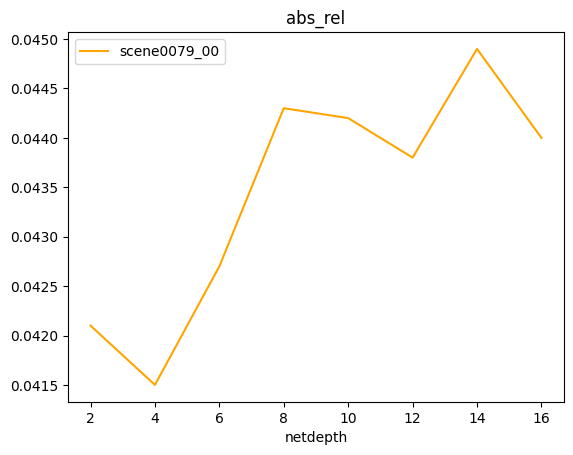

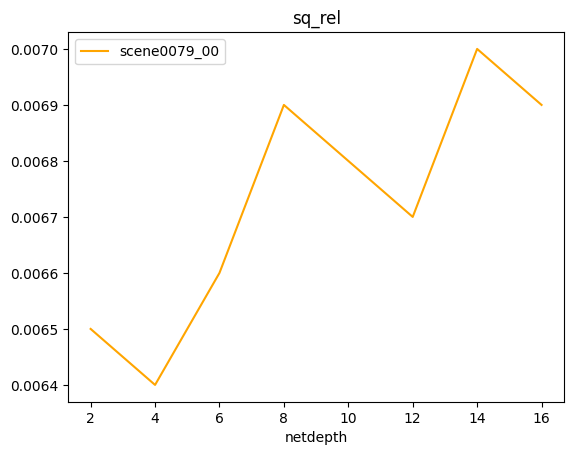

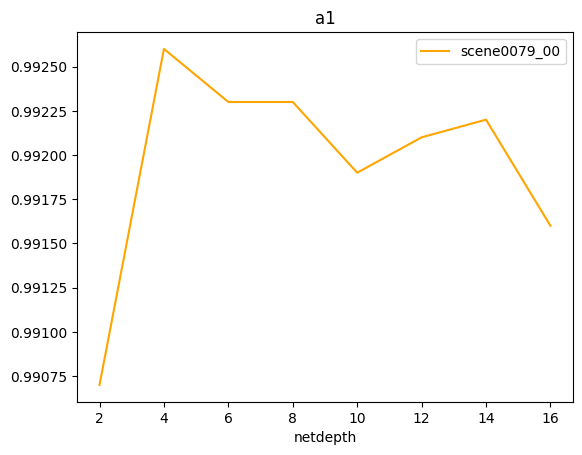

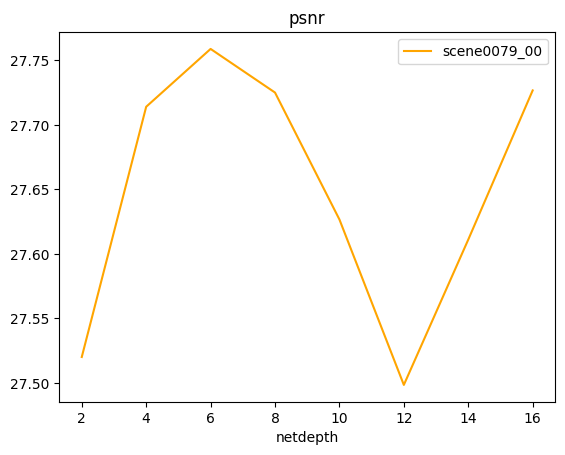

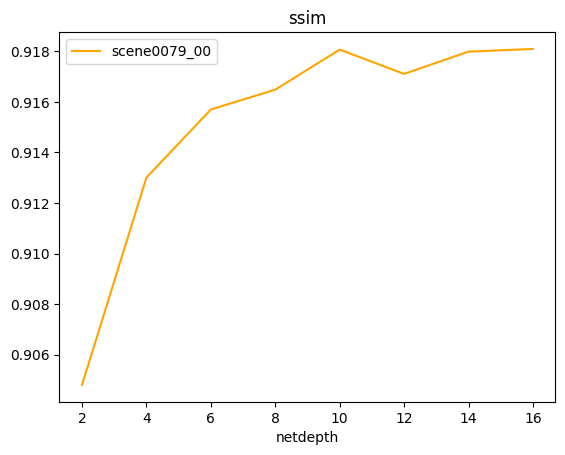

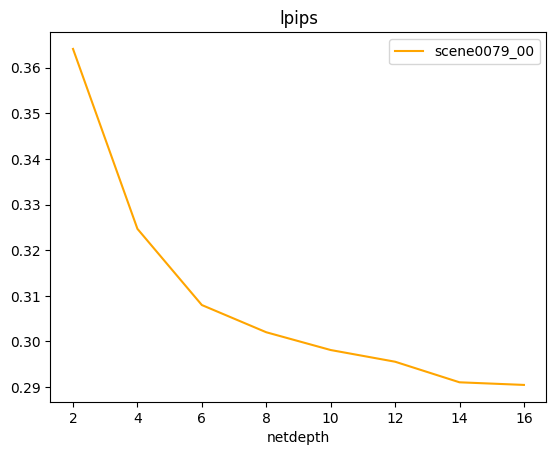

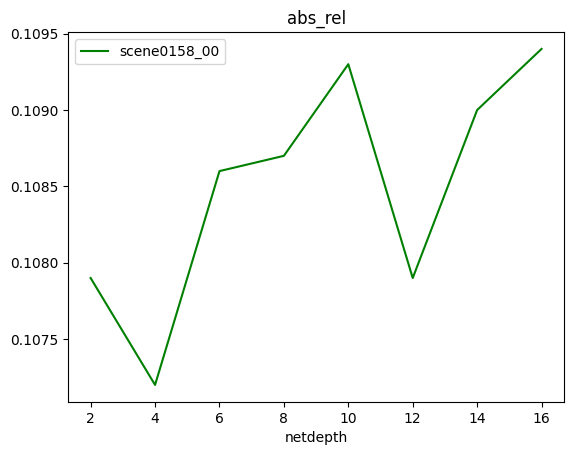

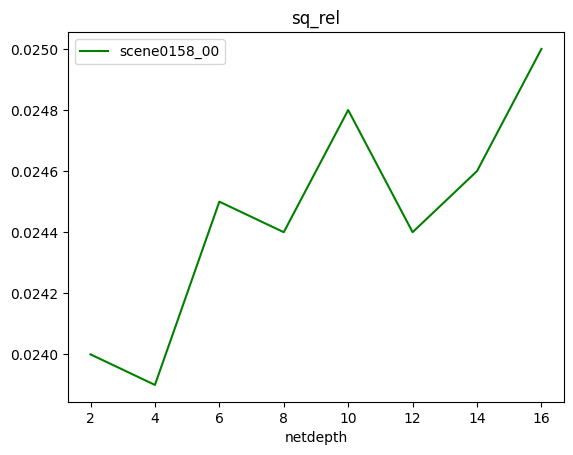

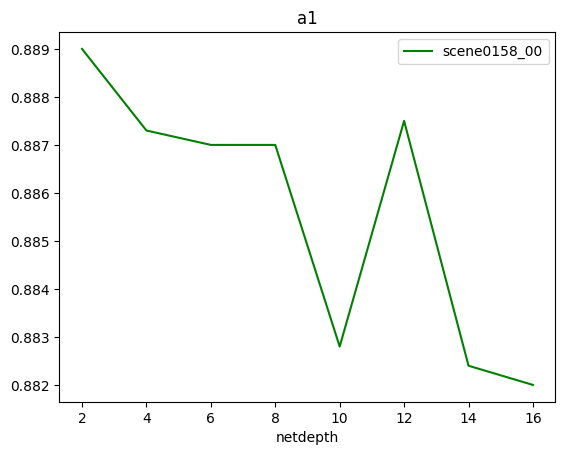

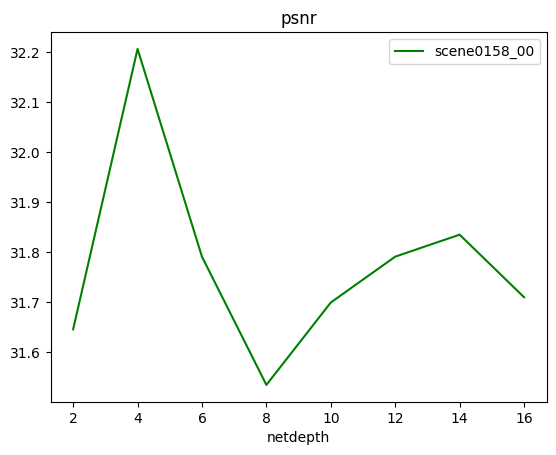

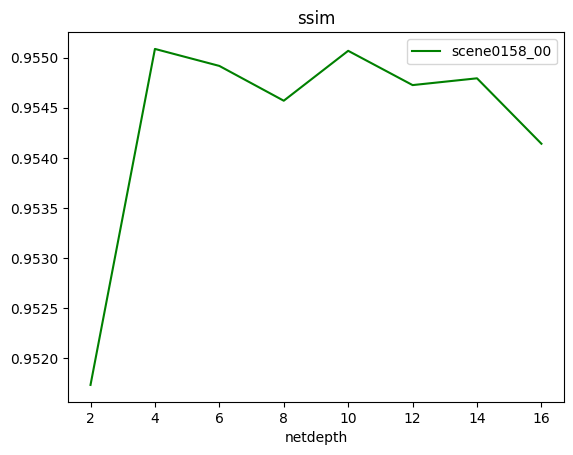

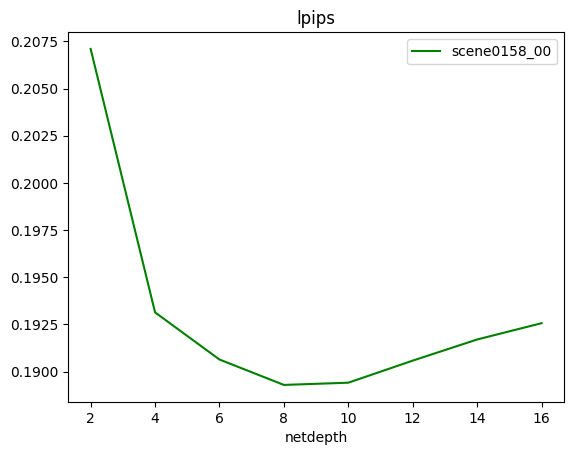

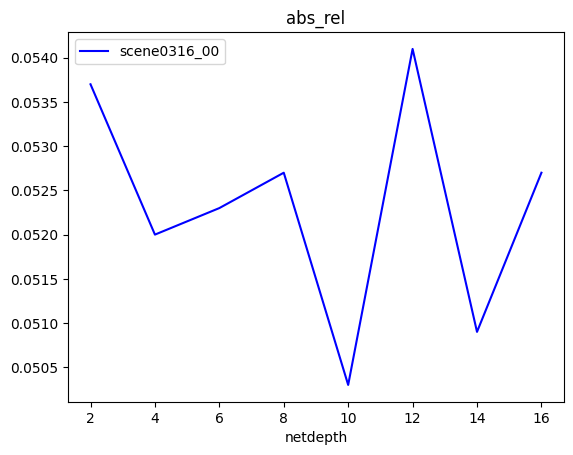

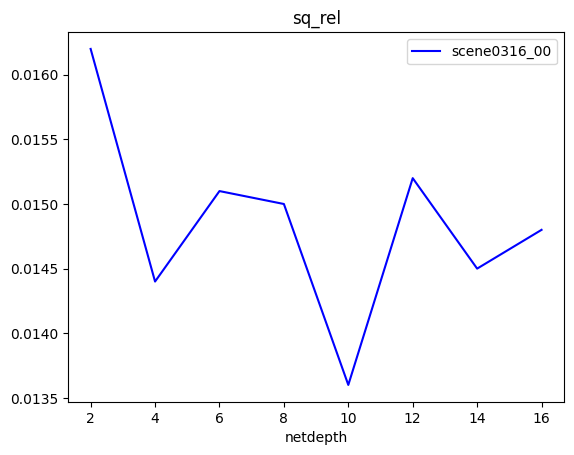

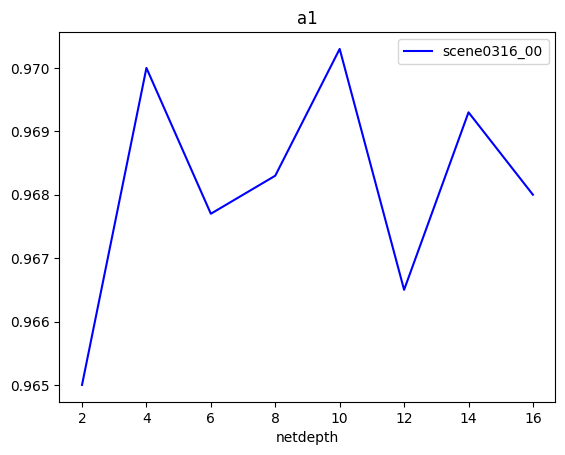

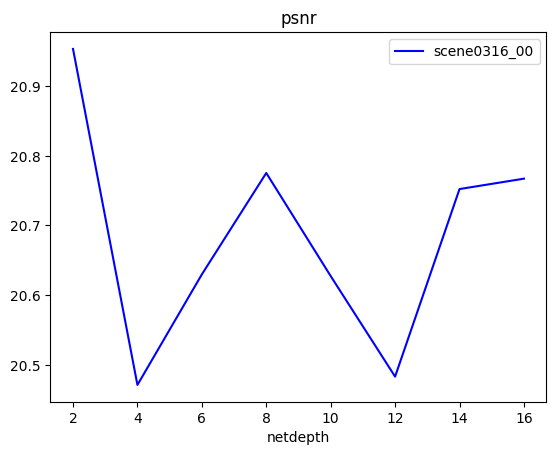

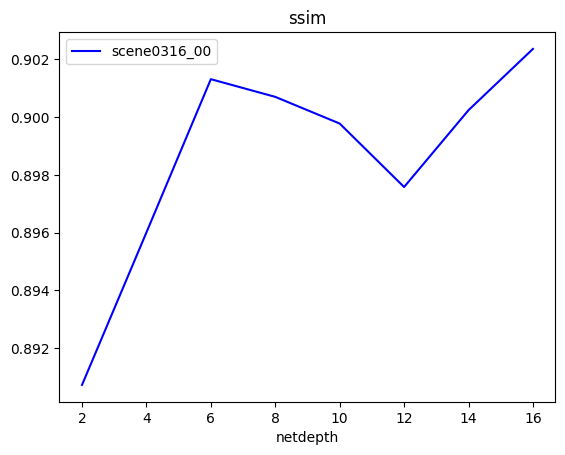

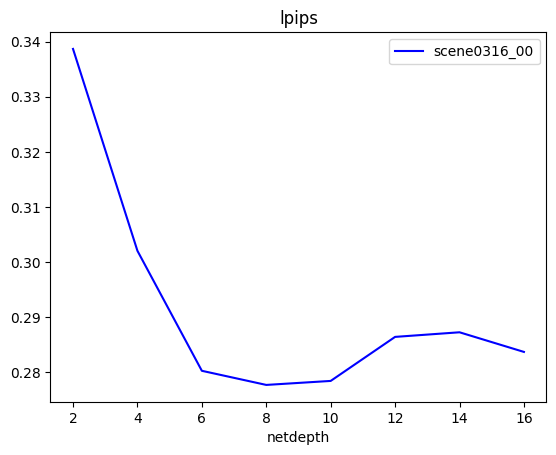

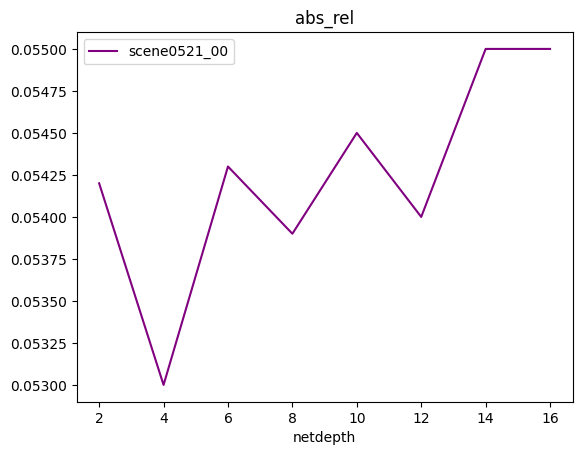

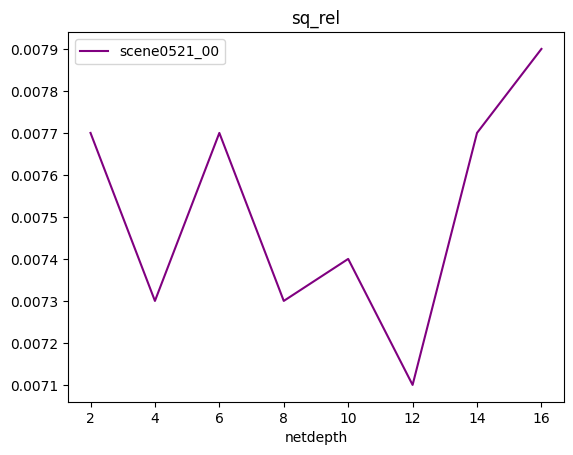

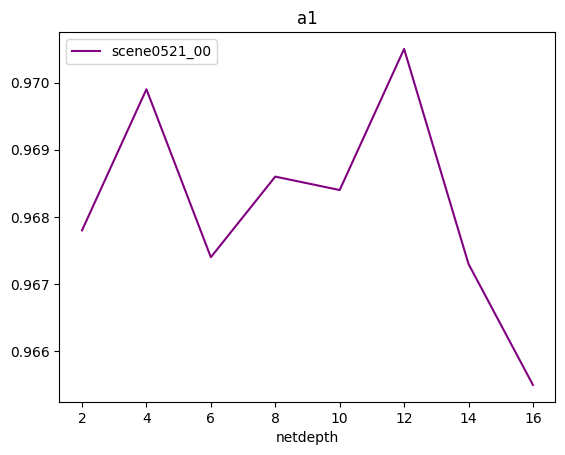

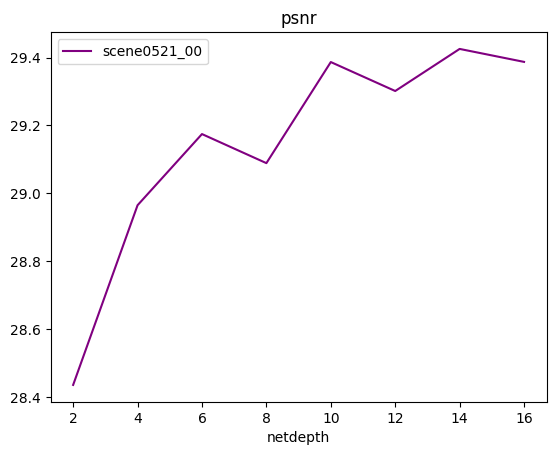

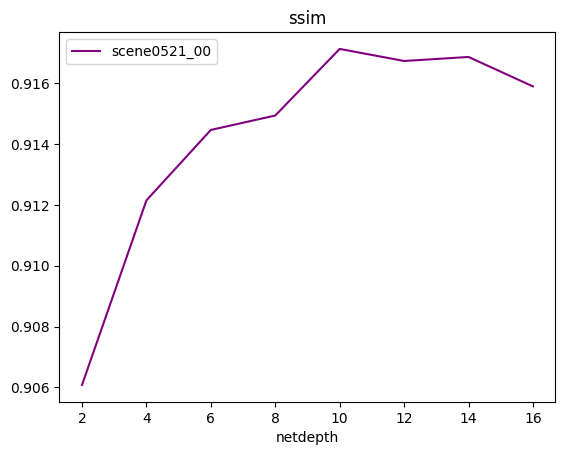

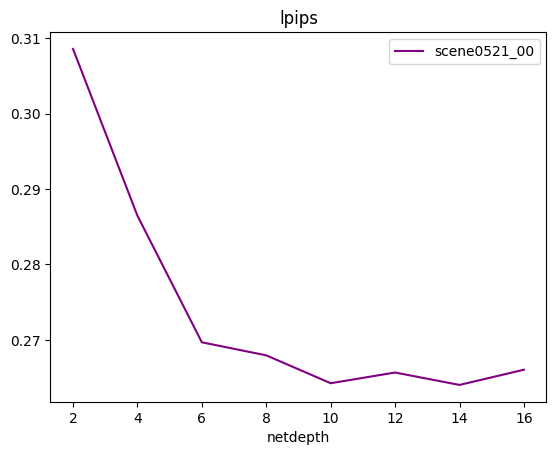

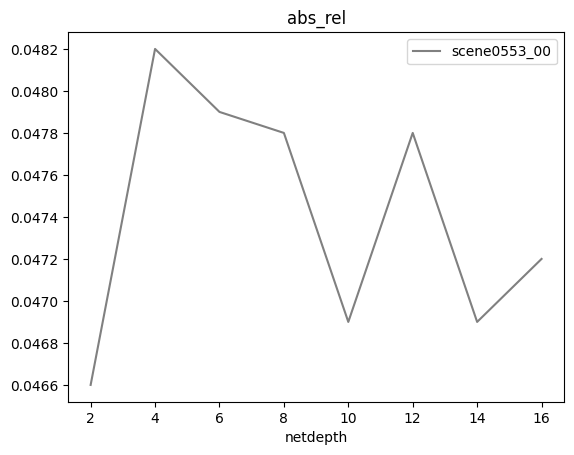

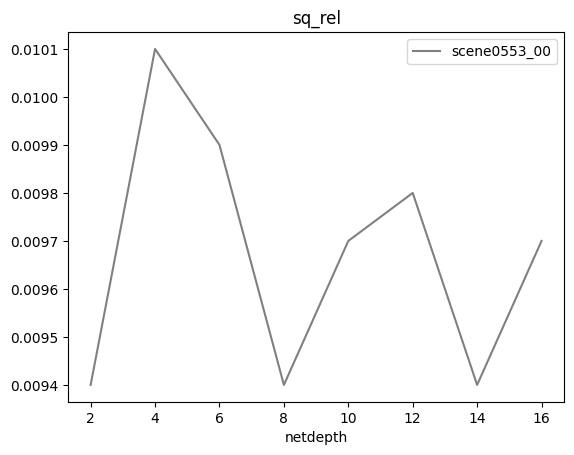

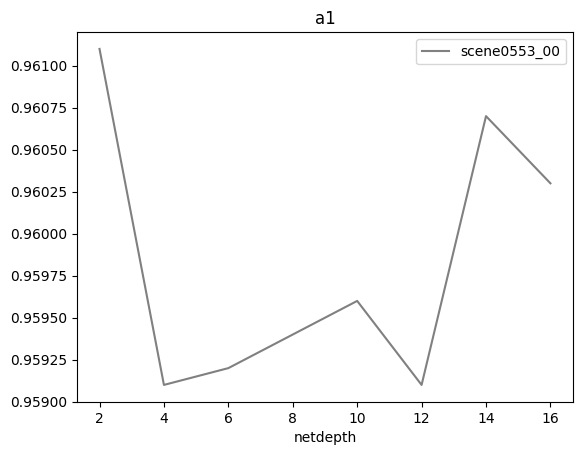

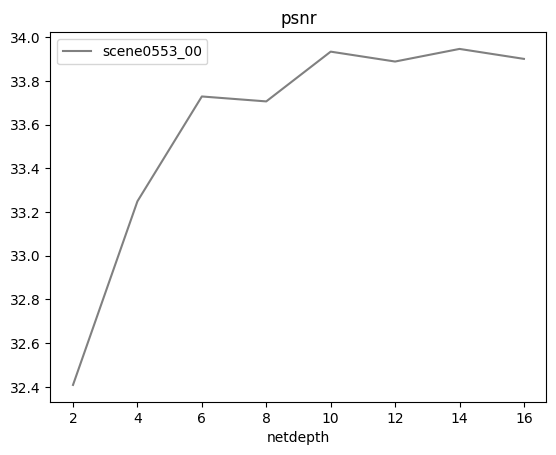

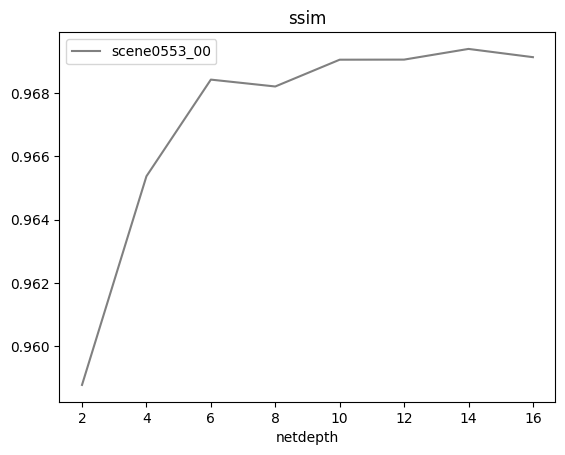

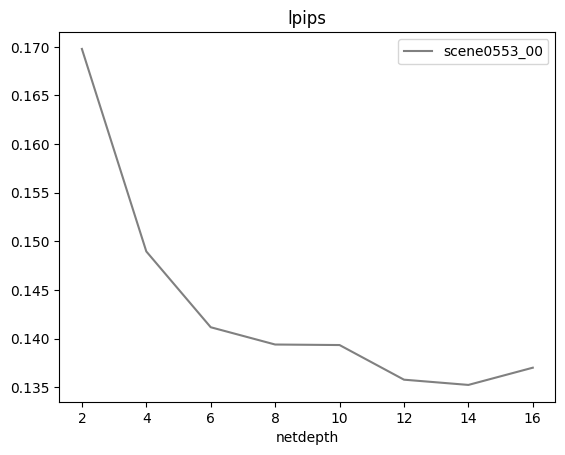

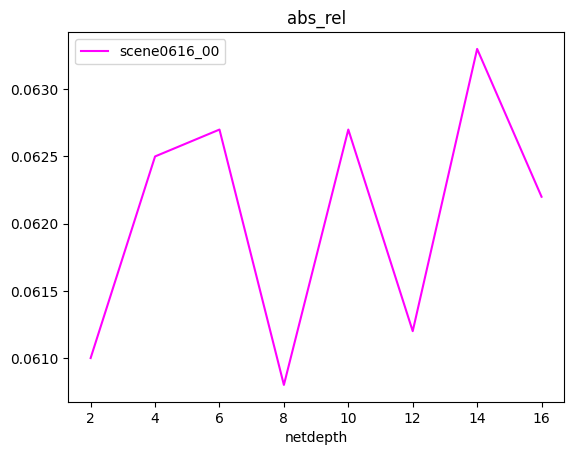

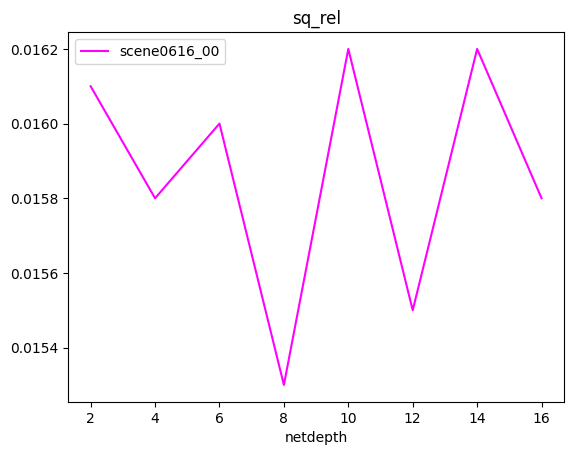

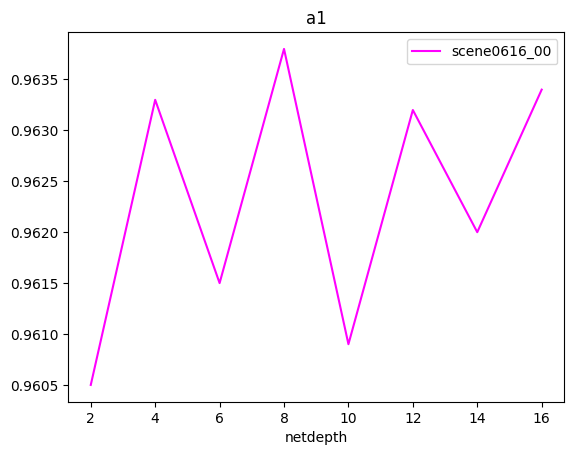

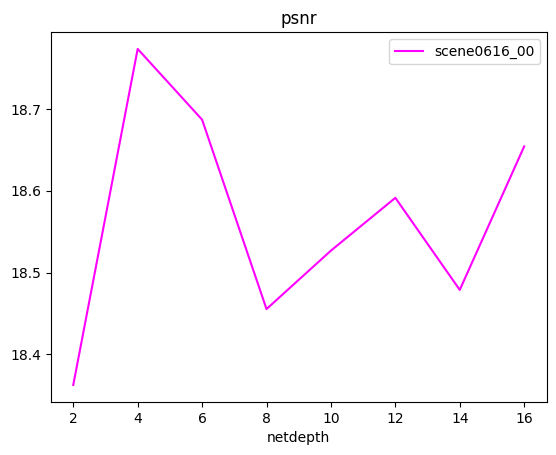

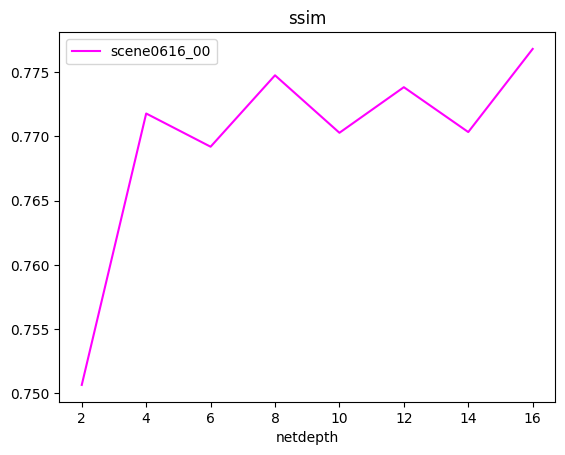

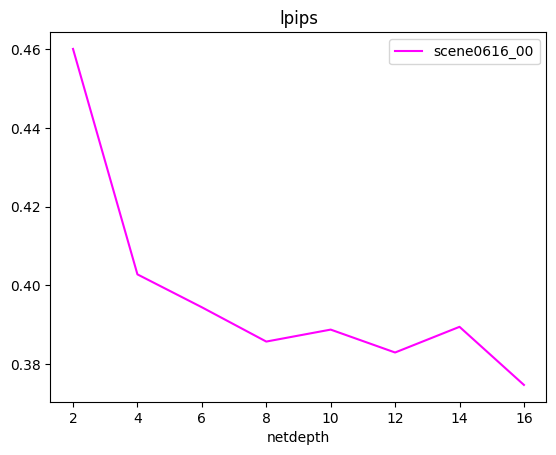

In [19]:
ax = None
colors = ['red', 'orange', 'green', 'blue','purple','grey', 'magenta', 'pink']
yaxes = ['abs_rel', 'sq_rel', 'a1', 'psnr', 'ssim', 'lpips']

axs = [None] * len(yaxes)
for i, yaxis in enumerate(yaxes):
    for scene, color in zip(scenes, colors):
        depth_query = df.query('scene == "{}" & netwidth == 256'.format(scene)).sort_values('netdepth')
        axs[i] = depth_query.plot(ax=axs[i], kind='line',x='netdepth',y=yaxis, title=yaxis, label=scene, color=color)
    plt.savefig('./results/{}.jpeg'.format(yaxis))

for scene, color in zip(scenes, colors):
    depth_query = df.query('scene == "{}" & netwidth == 256'.format(scene)).sort_values('netdepth')
    for i, yaxis in enumerate(yaxes):
        depth_query.plot(kind='line',x='netdepth',y=yaxis, title=yaxis, label=scene, color=color)
        plt.savefig('./results/{}_{}.jpeg'.format(scene, yaxis))


/home/ccl/anaconda3/envs/NeRF/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


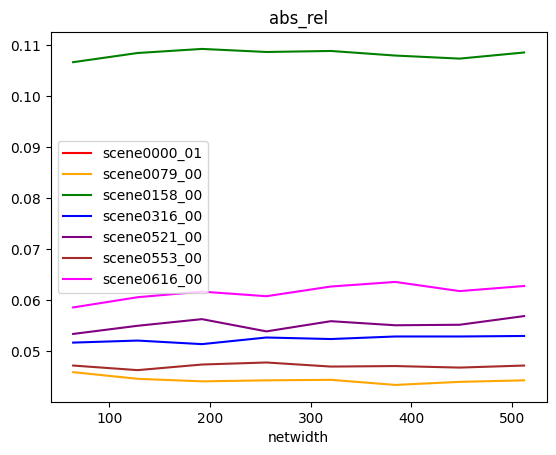

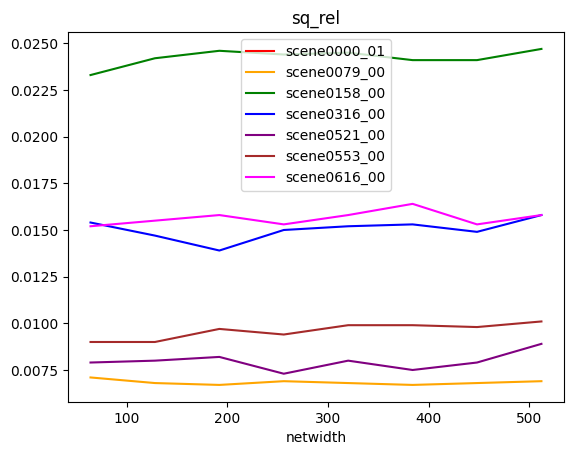

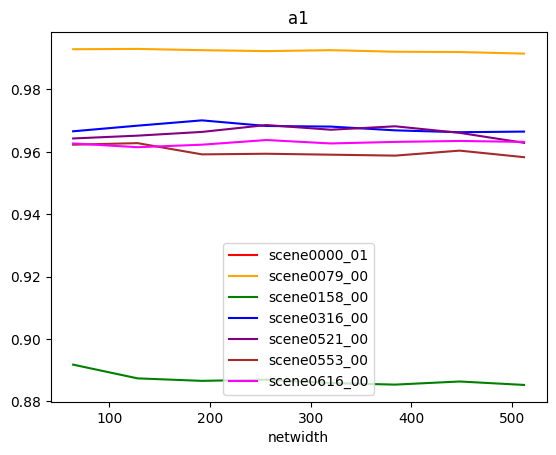

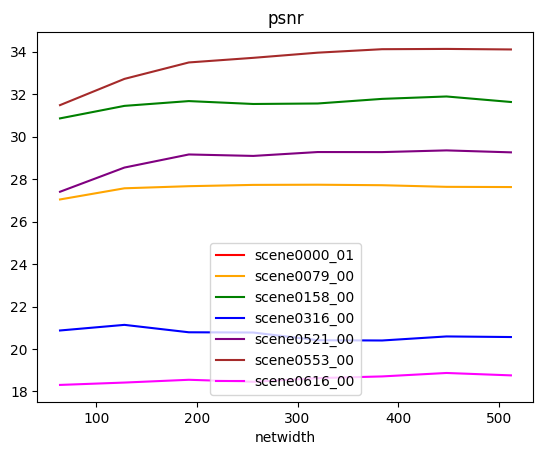

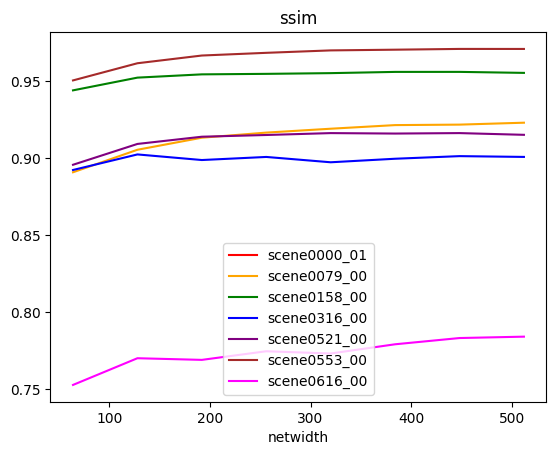

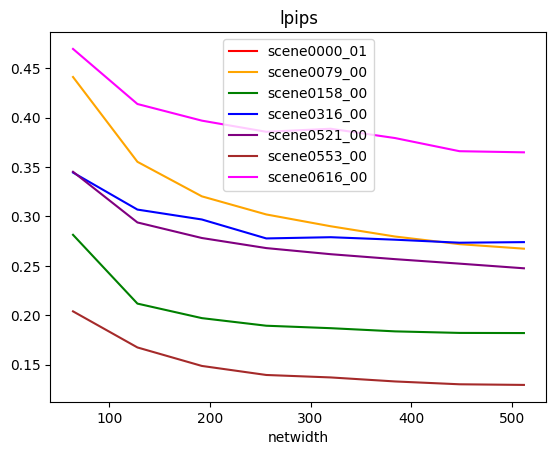

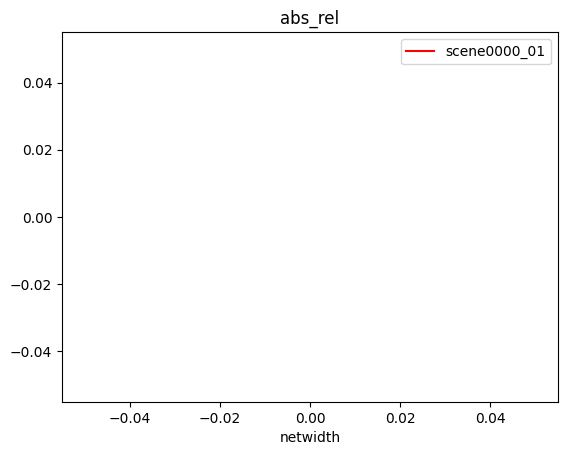

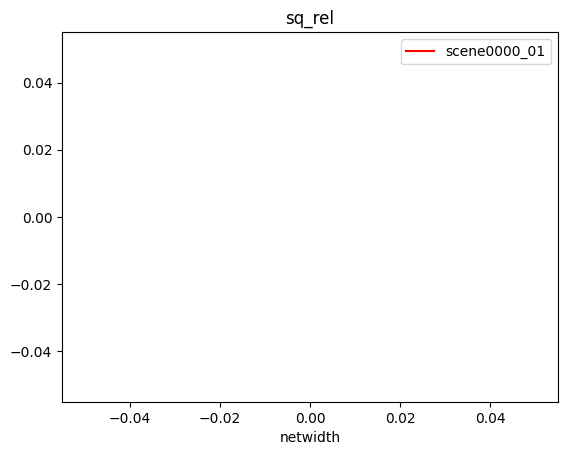

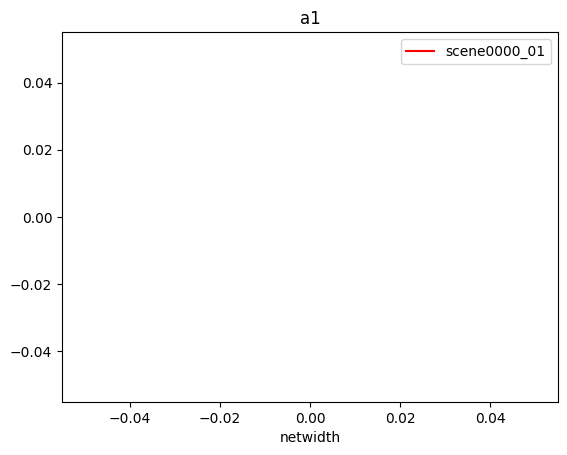

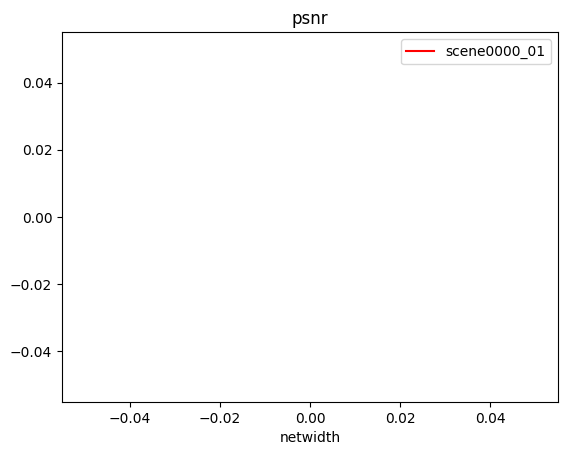

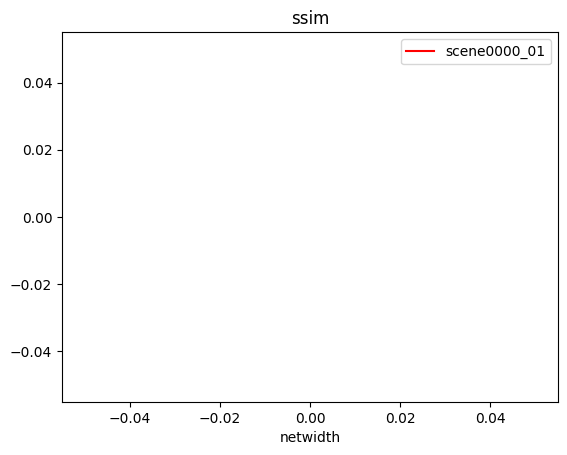

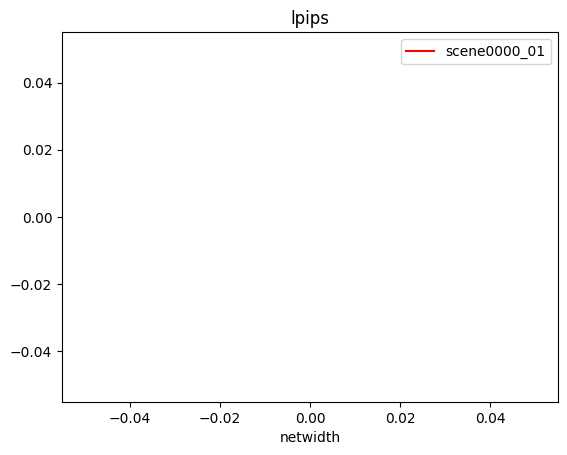

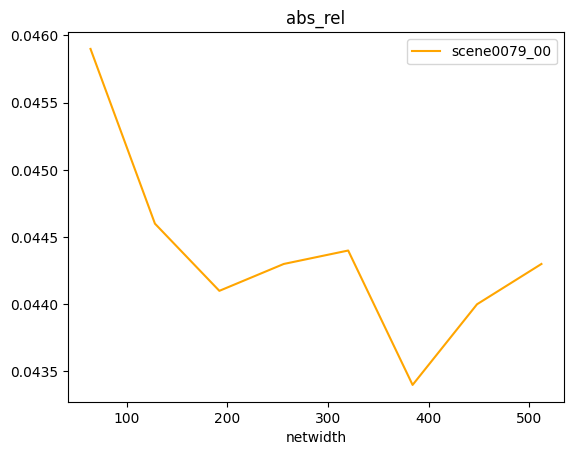

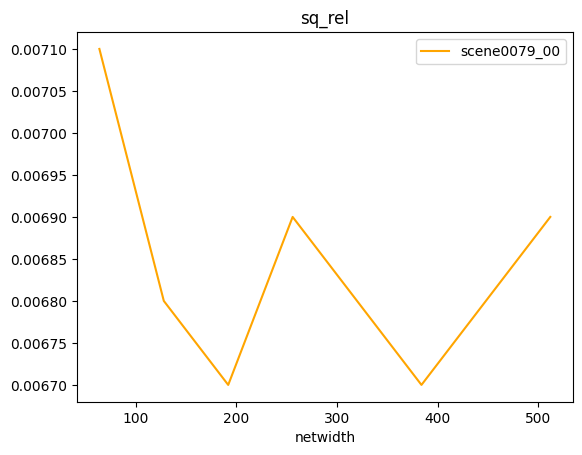

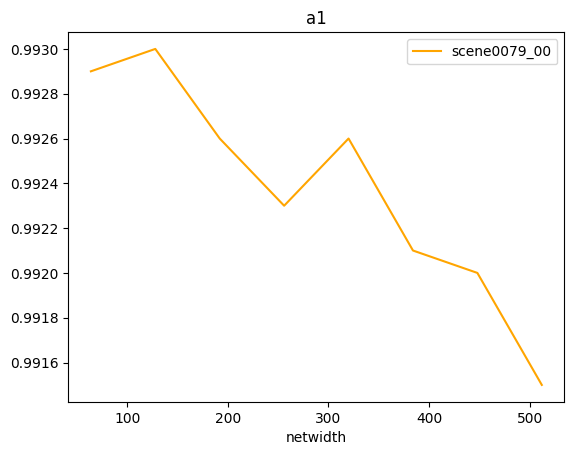

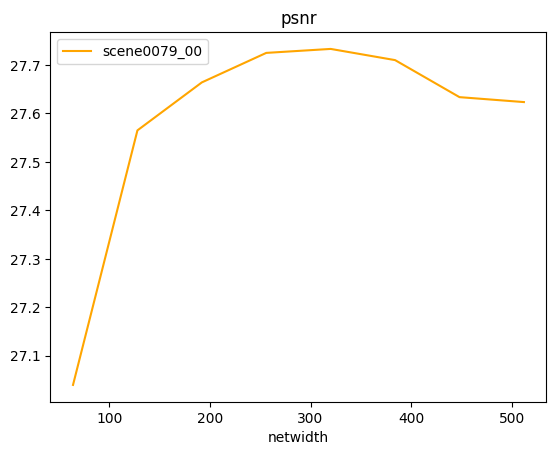

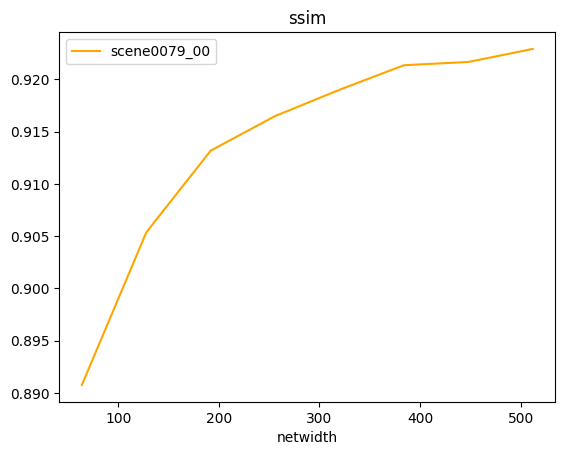

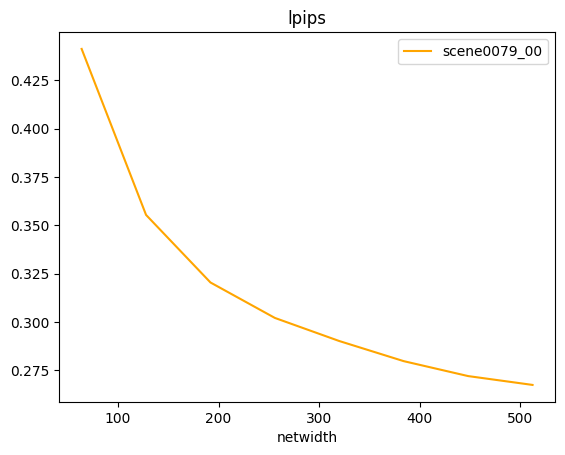

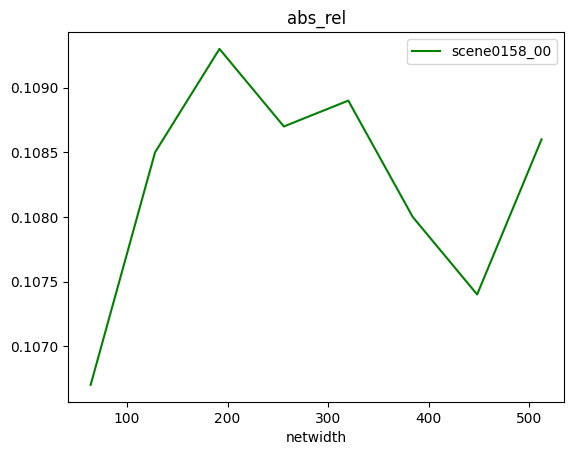

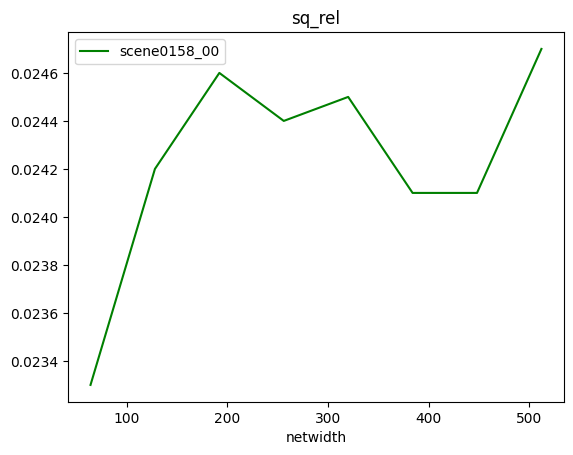

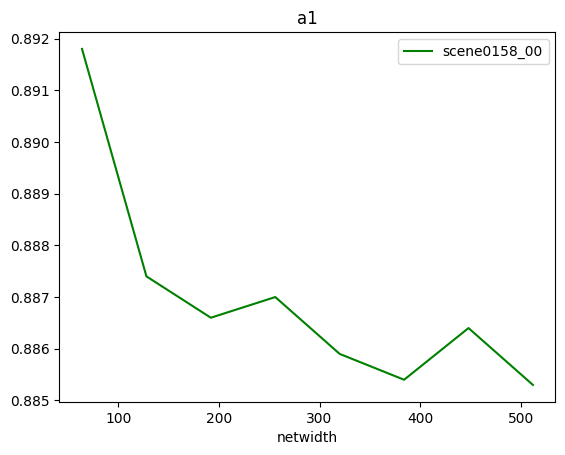

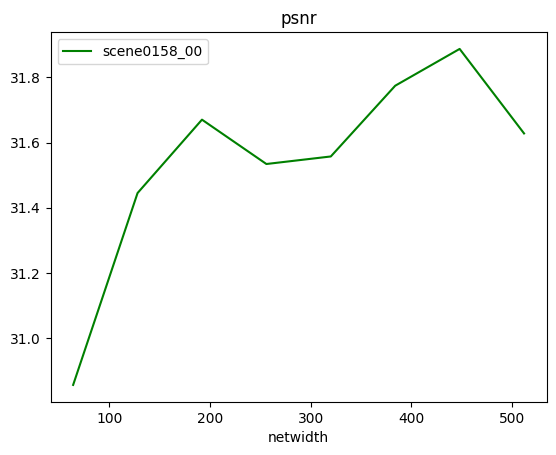

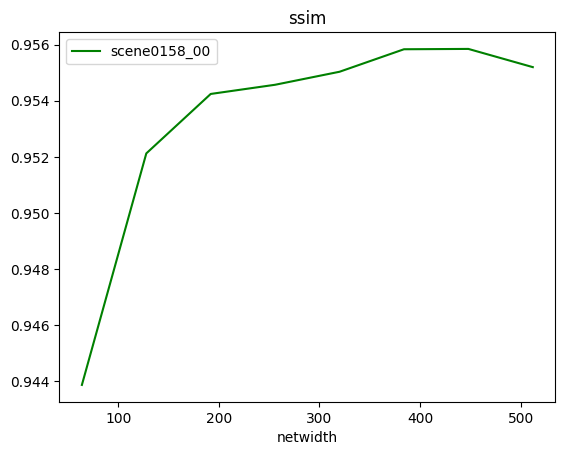

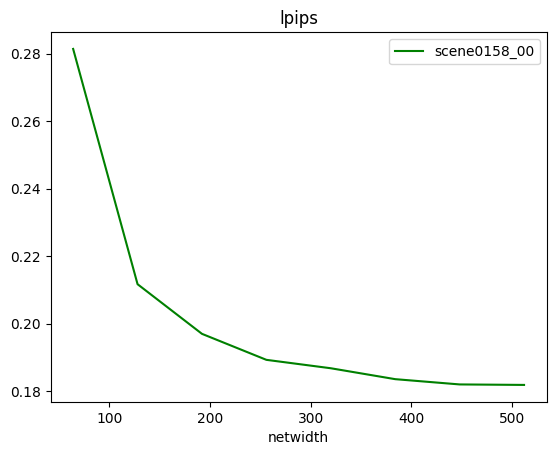

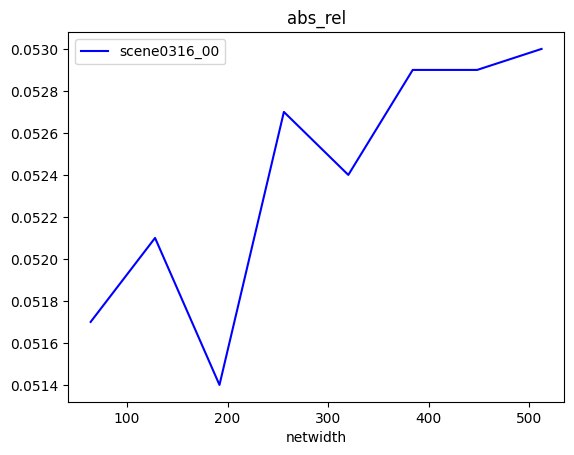

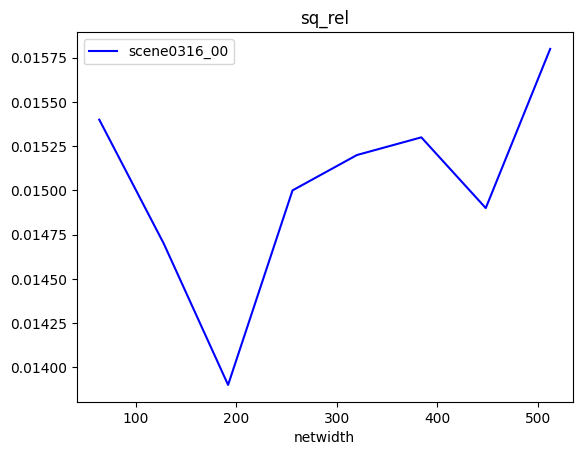

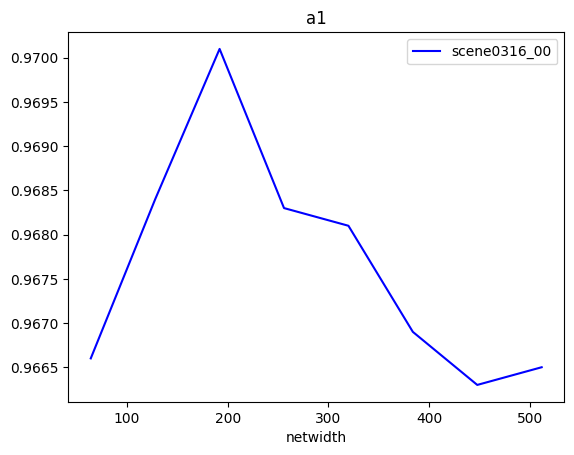

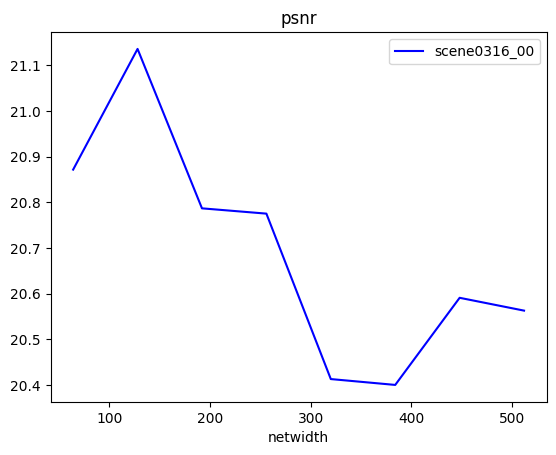

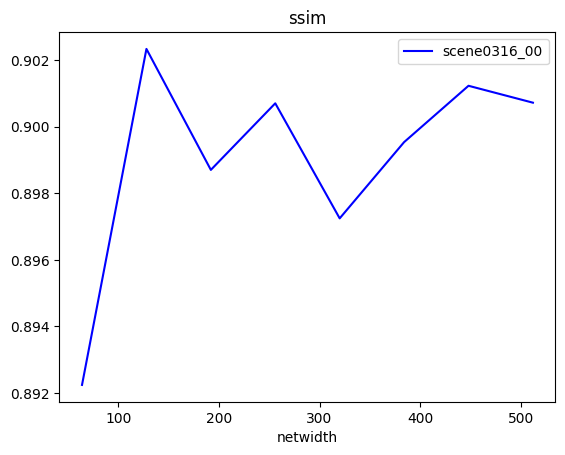

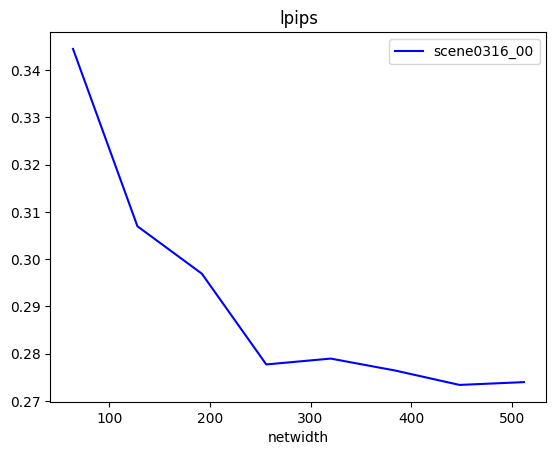

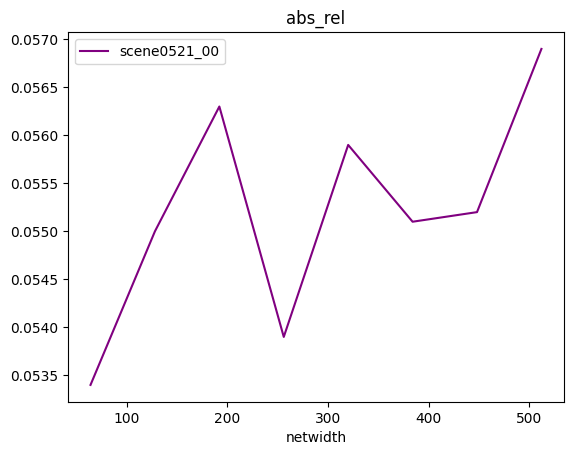

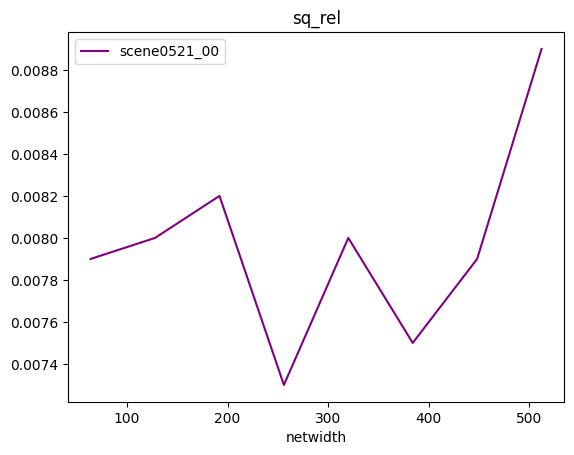

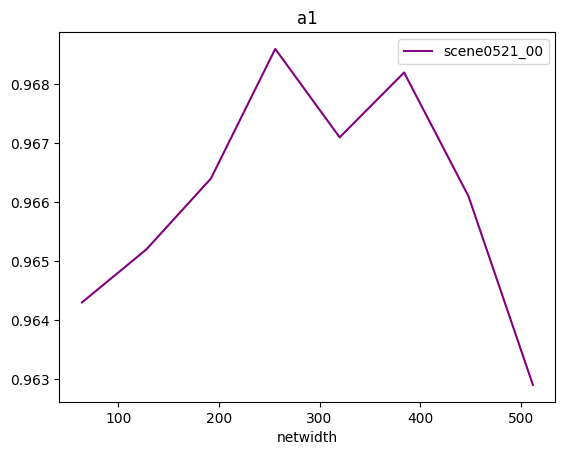

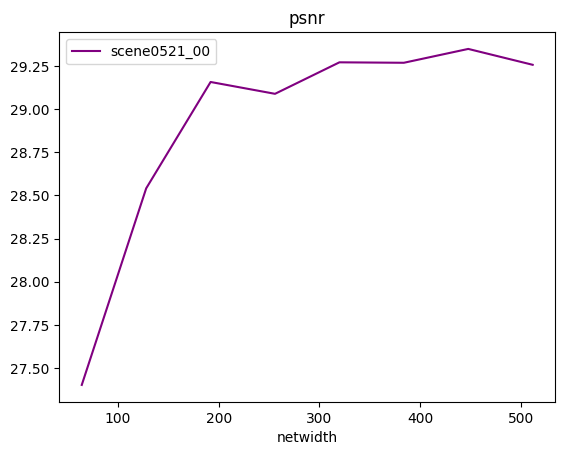

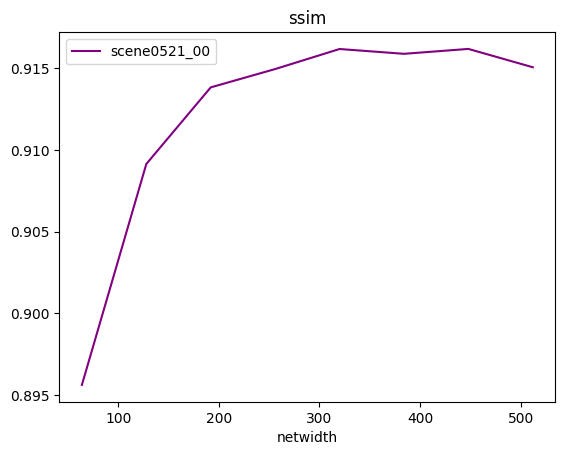

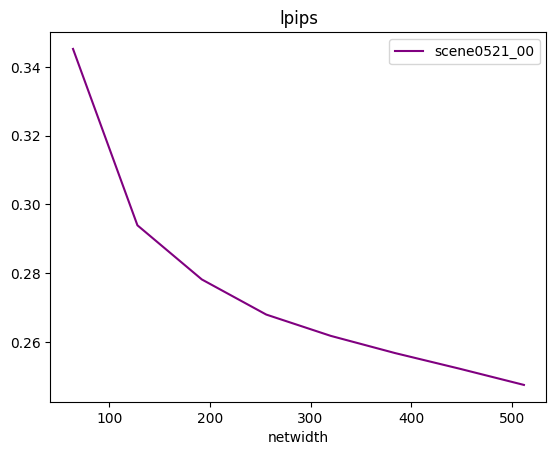

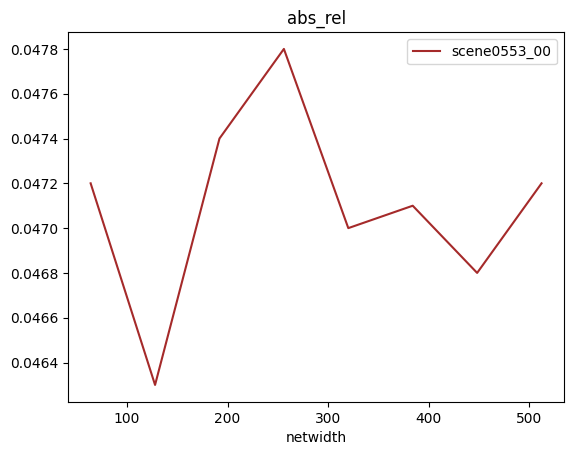

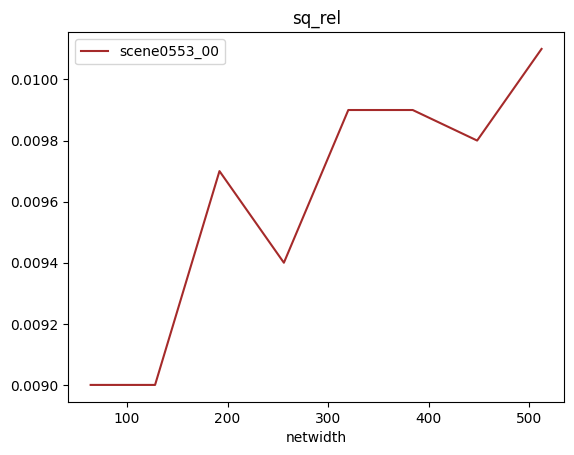

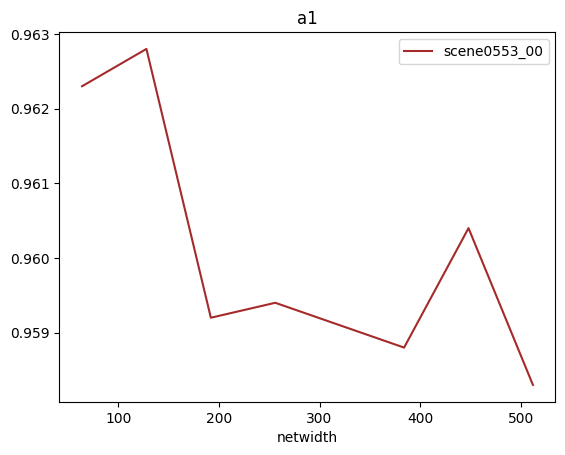

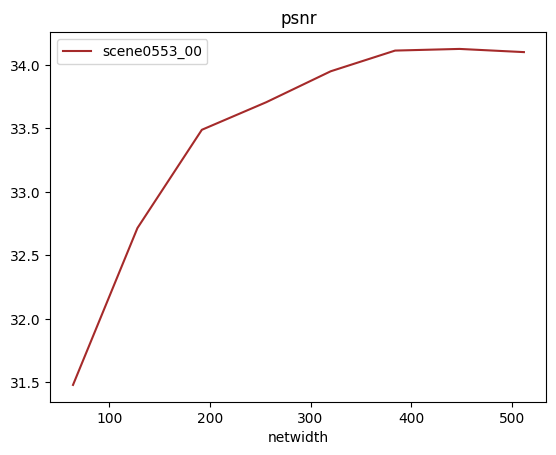

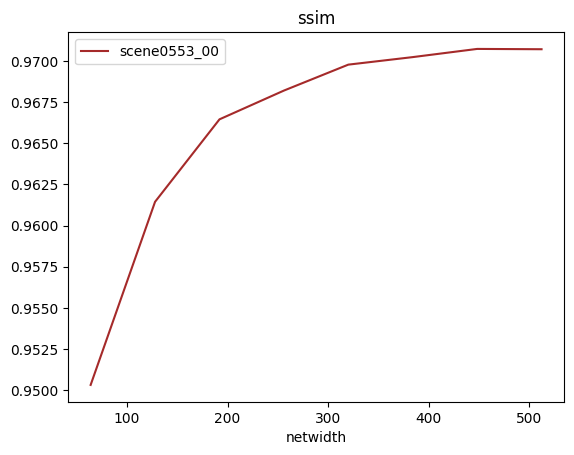

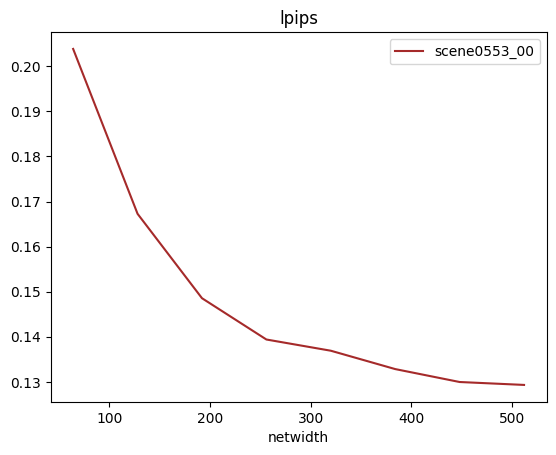

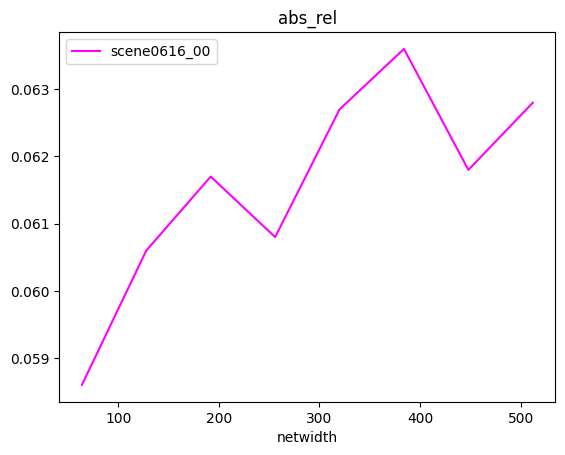

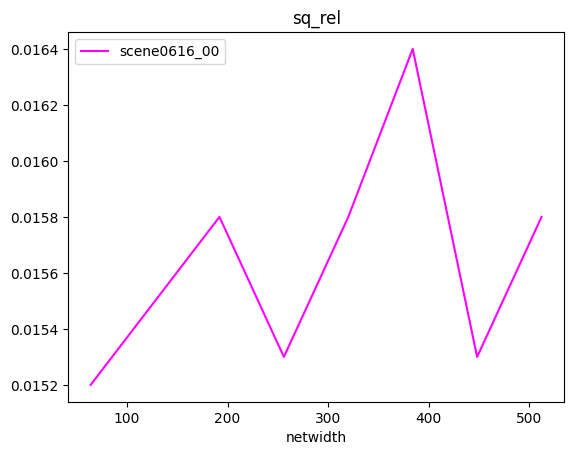

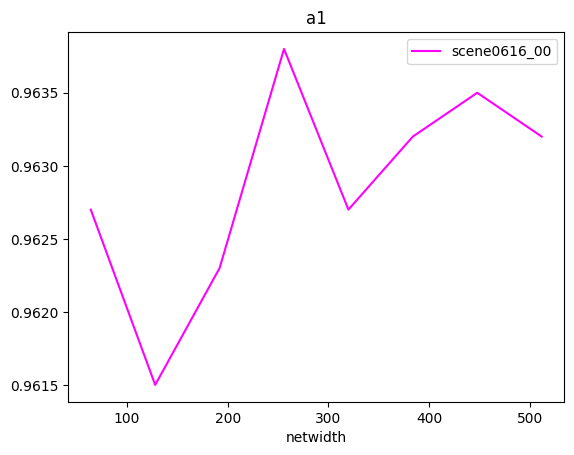

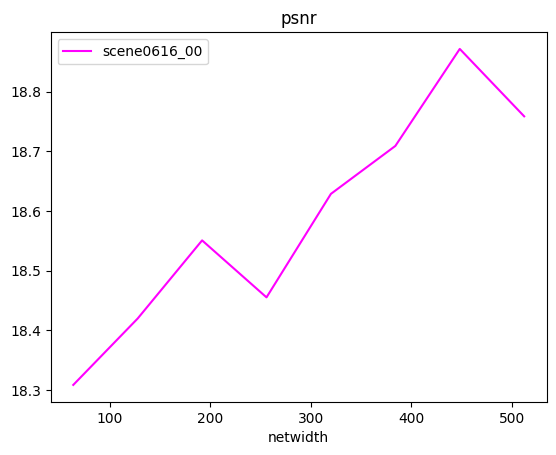

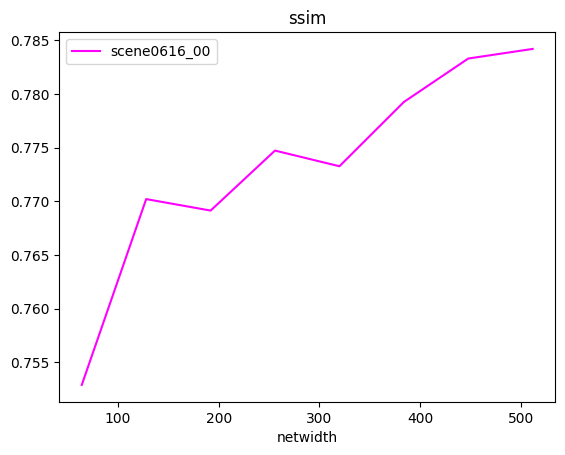

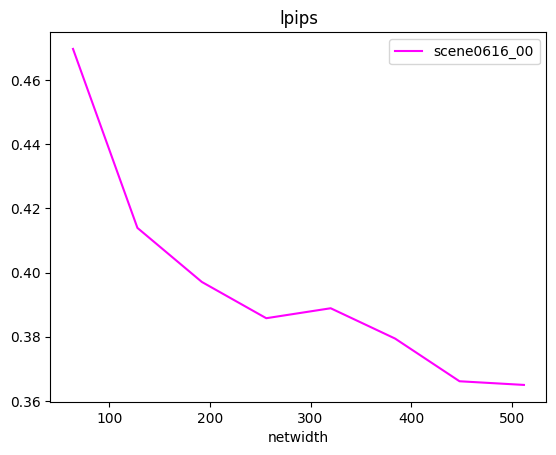

In [14]:
axs = [None] * len(yaxes)
for scene, color in zip(scenes, colors):
    depth_query = df.query('scene == "{}" & netdepth == 8'.format(scene)).sort_values('netwidth')
    for i, yaxis in enumerate(yaxes):
        axs[i] = depth_query.plot(ax=axs[i], kind='line',x='netwidth',y=yaxis, title=yaxis, label=scene, color=color)

for scene, color in zip(scenes, colors):
    depth_query = df.query('scene == "{}" & netdepth == 8'.format(scene)).sort_values('netwidth')
    for i, yaxis in enumerate(yaxes):
        depth_query.plot(kind='line',x='netwidth',y=yaxis, title=yaxis, label=scene, color=color)